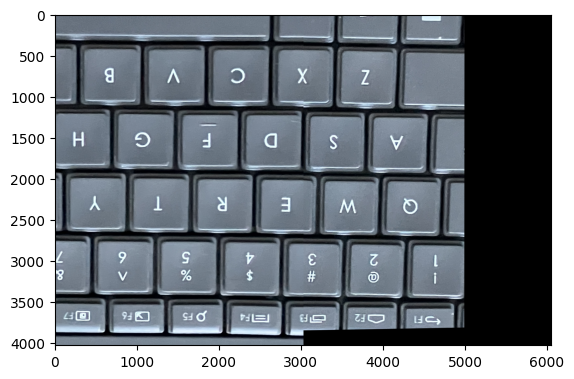

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
img1 = cv2.imread('IMG_0692.jpg')
img2 = cv2.imread('IMG_0693.jpg')

# Check if images loaded successfully
if img1 is None:
    print("Error: Could not load image IMG_0692.jpg")
    exit()
if img2 is None:
    print("Error: Could not load image IMG_0693.jpg")
    exit()

# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance and m.distance < 300:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Extract matched keypoints
src_pts = np.float32([kp1[m[0].queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1, 1, 2)

# Find homography
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 15.0, maxIters=5000, confidence=0.995) # Increased maxIters and confidence

# Warp the images and stitch them together
result = cv2.warpPerspective(img1, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))
result[0:img2.shape[0], 0:img2.shape[1]] = img2

# Display the stitched image
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()
